In [5]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv("IMDb Movies India.csv", encoding="latin1")


In [7]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [8]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [10]:
df = df.dropna(subset=["Rating"])

df["Year"] = df["Year"].str.extract(r"(\d{4})").astype(float)

df["Duration"] = df["Duration"].str.extract(r"(\d+)").astype(float)

df["Votes"] = df["Votes"].str.replace(",", "", regex=True).astype(float)

df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005.0,142.0,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012.0,82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [11]:
from sklearn.preprocessing import MultiLabelBinarizer

# Ensure all Genre values are strings first
df["Genre"] = df["Genre"].fillna("").astype(str)

# Split by comma
df["Genre"] = df["Genre"].apply(lambda x: x.split(","))

# Multi-label binarizer for genres
mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb.fit_transform(df["Genre"]), columns=mlb.classes_, index=df.index)


In [12]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,[Drama],7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019.0,110.0,"[Comedy, Romance]",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"[Comedy, Drama, Musical]",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005.0,142.0,"[Drama, Romance, War]",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012.0,82.0,"[Horror, Mystery, Thriller]",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,1992.0,NaN,"[Action, Crime, Drama]",5.3,135.0,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,1989.0,125.0,"[Action, Crime, Drama]",5.8,44.0,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,1988.0,NaN,[Action],4.6,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999.0,129.0,"[Action, Drama]",4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [13]:
from sklearn.preprocessing import MultiLabelBinarizer

# 1. Drop rows where Rating is missing
df = df.dropna(subset=["Rating"]).reset_index(drop=True)

# 2. Target variable
y = df["Rating"]

# 3. Process Genre safely
df["Genre"] = df["Genre"].fillna("").astype(str).apply(lambda x: x.split(","))
mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb.fit_transform(df["Genre"]), columns=mlb.classes_, index=df.index)

# 4. Process Director and Actors (limit to top 50, rest = "Other")
top_directors = df["Director"].value_counts().nlargest(50).index
df["Director"] = df["Director"].apply(lambda x: x if x in top_directors else "Other")

for col in ["Actor 1", "Actor 2", "Actor 3"]:
    top_actors = df[col].value_counts().nlargest(50).index
    df[col] = df[col].apply(lambda x: x if x in top_actors else "Other")

df_encoded = pd.get_dummies(df[["Director", "Actor 1", "Actor 2", "Actor 3"]], prefix_sep="_", drop_first=True)

# 5. Combine all features
X = pd.concat([
    df[["Year", "Duration", "Votes"]].fillna(0), 
    genre_encoded, 
    df_encoded
], axis=1)

print("✅ X shape:", X.shape)
print("✅ y shape:", y.shape)


✅ X shape: (7919, 279)
✅ y shape: (7919,)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

results = []
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5  # manual RMSE
    r2 = r2_score(y_test, y_pred)
    results.append([name, mae, rmse, r2])

results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R2"])
print(results_df)


               Model       MAE      RMSE        R2
0  Linear Regression  0.939092  1.195386  0.231395
1      Random Forest  0.809195  1.078525  0.374327
2  Gradient Boosting  0.833980  1.094980  0.355091


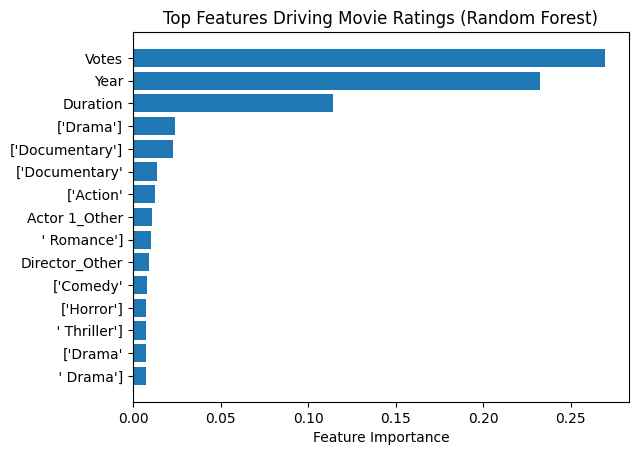

In [17]:
import matplotlib.pyplot as plt

rf = trained_models["Random Forest"]
importances = rf.feature_importances_
indices = np.argsort(importances)[-15:]  # Top 15 features

plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Top Features Driving Movie Ratings (Random Forest)")
plt.show()


In [18]:
import joblib

best_model = trained_models["Random Forest"]

joblib.dump(best_model, "movie_rating_predictor.pkl")

print("✅ Model saved as movie_rating_predictor.pkl")


✅ Model saved as movie_rating_predictor.pkl


In [19]:

from sklearn.preprocessing import MultiLabelBinarizer

def preprocess_data(df, mlb=None, top_directors=None, top_actors=None, fit=True):
    """
    Preprocess movie dataframe for training or prediction.
    If fit=True: learns encoders (mlb, top_directors, top_actors)
    If fit=False: uses provided encoders (for new data)
    """
    df = df.copy()

    # Clean Year
    df["Year"] = df["Year"].astype(str).str.extract(r"(\d{4})").astype(float)

    # Clean Duration
    df["Duration"] = df["Duration"].astype(str).str.extract(r"(\d+)").astype(float)

    # Clean Votes
    df["Votes"] = df["Votes"].astype(str).str.replace(",", "", regex=True).astype(float)

    # Handle Genre
    df["Genre"] = df["Genre"].fillna("").astype(str).apply(lambda x: x.split(","))
    if fit:
        mlb = MultiLabelBinarizer()
        genre_encoded = pd.DataFrame(mlb.fit_transform(df["Genre"]), 
                                     columns=mlb.classes_, index=df.index)
    else:
        genre_encoded = pd.DataFrame(mlb.transform(df["Genre"]), 
                                     columns=mlb.classes_, index=df.index)

    # Handle Directors
    if fit:
        top_directors = df["Director"].value_counts().nlargest(50).index
    df["Director"] = df["Director"].apply(lambda x: x if x in top_directors else "Other")

    # Handle Actors
    for col in ["Actor 1", "Actor 2", "Actor 3"]:
        if fit:
            top_actors = df[col].value_counts().nlargest(50).index
        df[col] = df[col].apply(lambda x: x if x in top_actors else "Other")

    df_encoded = pd.get_dummies(df[["Director", "Actor 1", "Actor 2", "Actor 3"]],
                                prefix_sep="_", drop_first=True)

    # Final feature matrix
    X = pd.concat([df[["Year", "Duration", "Votes"]].fillna(0), 
                   genre_encoded, 
                   df_encoded], axis=1)

    if fit:
        return X, mlb, top_directors, top_actors
    else:
        return X


In [20]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),2019.0,109.0,[['Drama']],7.0,8.0,Other,Other,Other,Other
1,#Yaaram,2019.0,110.0,"[['Comedy', ' Romance']]",4.4,35.0,Other,Other,Other,Other
2,...Aur Pyaar Ho Gaya,1997.0,147.0,"[['Comedy', ' Drama', ' Musical']]",4.7,827.0,Rahul Rawail,Other,Other,Other
3,...Yahaan,2005.0,142.0,"[['Drama', ' Romance', ' War']]",7.4,1086.0,Other,Jimmy Sheirgill,Other,Other
4,?: A Question Mark,2012.0,82.0,"[['Horror', ' Mystery', ' Thriller']]",5.6,326.0,Other,Other,Other,Other
...,...,...,...,...,...,...,...,...,...,...
7914,Zulm Ki Hukumat,1992.0,NaN,"[['Action', ' Crime', ' Drama']]",5.3,135.0,Other,Dharmendra,Moushumi Chatterjee,Govinda
7915,Zulm Ki Zanjeer,1989.0,125.0,"[['Action', ' Crime', ' Drama']]",5.8,44.0,Other,Other,Other,Other
7916,Zulm Ko Jala Doonga,1988.0,NaN,[['Action']],4.6,11.0,Other,Naseeruddin Shah,Other,Other
7917,Zulmi,1999.0,129.0,"[['Action', ' Drama']]",4.5,655.0,Other,Akshay Kumar,Other,Aruna Irani


In [21]:
# Training preprocessing
X, mlb, top_directors, top_actors = preprocess_data(df, fit=True)
y = df["Rating"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your best model (say Random Forest)
from sklearn.ensemble import RandomForestRegressor
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
# New movie input
new_movie = pd.DataFrame([{
    "Year": 2025,
    "Duration": 120,
    "Votes": 50000,
    "Genre": "Drama,Romance",   # comma-separated
    "Director": "Sanjay Leela Bhansali",
    "Actor 1": "Ranveer Singh",
    "Actor 2": "Deepika Padukone",
    "Actor 3": "Other"
}])

# Preprocess new movie using saved encoders
new_movie_processed = preprocess_data(new_movie, mlb=mlb, 
                                      top_directors=top_directors, 
                                      top_actors=top_actors, 
                                      fit=False)

# Align columns with training data
new_movie_processed = new_movie_processed.reindex(columns=X.columns, fill_value=0)

# Predict
predicted_rating = best_model.predict(new_movie_processed)
print("🎬 Predicted Rating:", predicted_rating[0])


🎬 Predicted Rating: 6.249000000000007


C:\Users\payal\AppData\Roaming\Python\Python313\site-packages\sklearn\preprocessing\_label.py:909: UserWarning: unknown class(es) ['Drama', 'Romance'] will be ignored
  warnings.warn(


In [23]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),2019.0,109.0,[['Drama']],7.0,8.0,Other,Other,Other,Other
1,#Yaaram,2019.0,110.0,"[['Comedy', ' Romance']]",4.4,35.0,Other,Other,Other,Other
2,...Aur Pyaar Ho Gaya,1997.0,147.0,"[['Comedy', ' Drama', ' Musical']]",4.7,827.0,Rahul Rawail,Other,Other,Other
3,...Yahaan,2005.0,142.0,"[['Drama', ' Romance', ' War']]",7.4,1086.0,Other,Jimmy Sheirgill,Other,Other
4,?: A Question Mark,2012.0,82.0,"[['Horror', ' Mystery', ' Thriller']]",5.6,326.0,Other,Other,Other,Other


In [24]:
print(X.shape, y.shape)


(7919, 275) (7919,)


In [25]:
print(X_train.shape, X_test.shape)


(6335, 275) (1584, 275)


In [26]:
print(trained_models.keys())


dict_keys(['Linear Regression', 'Random Forest', 'Gradient Boosting'])


In [27]:
print(results_df)


               Model       MAE      RMSE        R2
0  Linear Regression  0.939092  1.195386  0.231395
1      Random Forest  0.809195  1.078525  0.374327
2  Gradient Boosting  0.833980  1.094980  0.355091


In [28]:
print("🎬 Predicted Rating:", predicted_rating[0])


🎬 Predicted Rating: 6.249000000000007
